In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from collections import namedtuple
from shapely import geometry
from pylab import Rectangle

# import scipy

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy

Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 477.13.1.el8_8.x86_64 x86_64 with glibc2.17
numpy 1.22.3
matplotlib 3.4.2
xarray 0.19.0
cartopy 0.18.0
scipy 1.7.1
Mon Aug 07 14:06:30 2023 CEST

In [3]:
#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

# Loading the data:

In [4]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/'

In [5]:
filedir_e = 'KDEs/'

In [6]:
ds_nT_Jul_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')

ds_nT_Sep_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')

ds_nT_Dec_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')

ds_nT_Mar_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')

ds_nT_Jun_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')


In [7]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [8]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

# KDE

In [9]:
kde_nT_Jul = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.npz')
kde_nT_Aug = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.npz')
kde_nT_Sep = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.npz')
kde_nT_Oct = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.npz')
kde_nT_Nov = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.npz')
kde_nT_Dec = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.npz')
kde_nT_Jan = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.npz')
kde_nT_Feb = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.npz')
kde_nT_Mar = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.npz')
kde_nT_Apr = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.npz')
kde_nT_May = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.npz')
kde_nT_Jun = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.npz')


In [10]:
kde_nT = [kde_nT_Jul, 
    kde_nT_Aug, 
    kde_nT_Sep,
    kde_nT_Oct,
    kde_nT_Nov,
    kde_nT_Dec,
    kde_nT_Jan,
    kde_nT_Feb,
    kde_nT_Mar,
    kde_nT_Apr,
    kde_nT_May,
    kde_nT_Jun ]


In [11]:
kde_wT_Jul = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.npz')
kde_wT_Aug = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.npz')
kde_wT_Sep = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.npz')
kde_wT_Oct = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.npz')
kde_wT_Nov = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.npz')
kde_wT_Dec = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.npz')
kde_wT_Jan = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.npz')
kde_wT_Feb = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.npz')
kde_wT_Mar = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.npz')
kde_wT_Apr = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.npz')
kde_wT_May = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.npz')
kde_wT_Jun = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.npz')


In [12]:
kde_wT = [kde_wT_Jul, 
    kde_wT_Aug, 
    kde_wT_Sep,
    kde_wT_Oct,
    kde_wT_Nov,
    kde_wT_Dec,
    kde_wT_Jan,
    kde_wT_Feb,
    kde_wT_Mar,
    kde_wT_Apr,
    kde_wT_May,
    kde_wT_Jun ]


In [13]:
ntitles = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] # order by OGCM months


# All months plot:

In [14]:

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=.8)



In [15]:
cbar_ticks = [0.005, 0.006, 0.007, 0.008, 0.009] 


# Joint plot:

In [16]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)

geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)

# No subregion box:

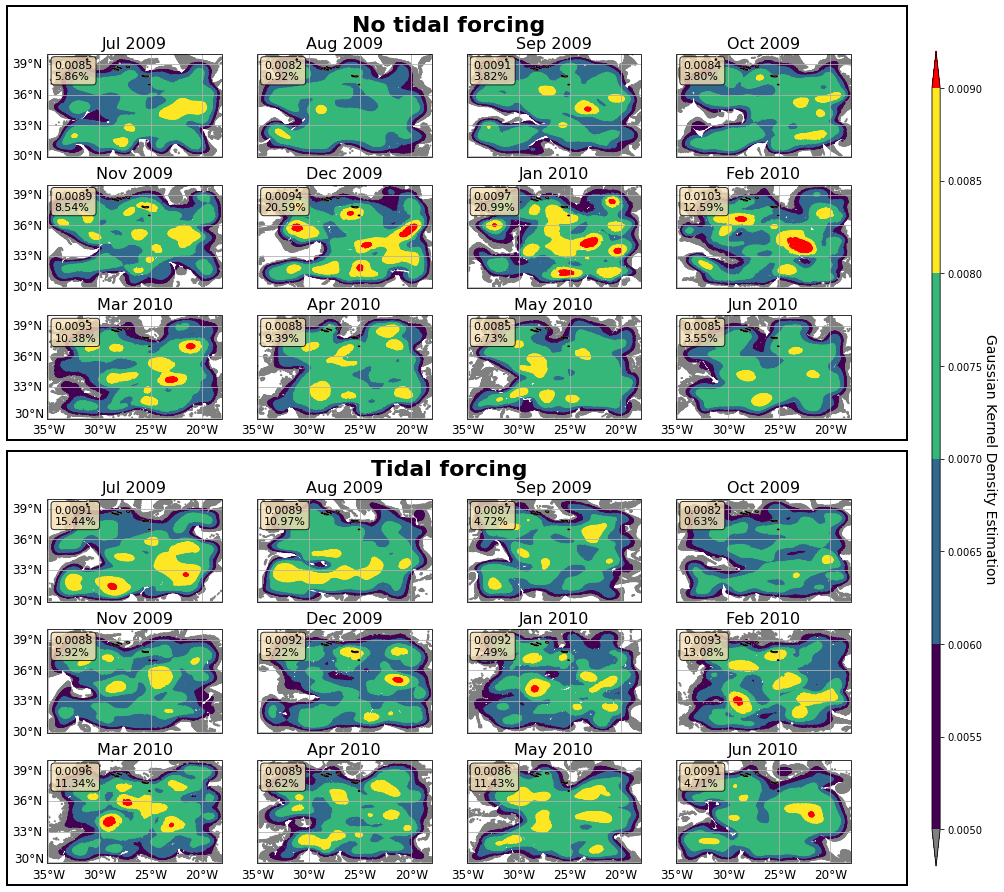

In [25]:
fig = plt.figure(figsize=(16,15)) #(17,5)

cbar_ticks = [0.005, 0.006, 0.007, 0.008, 0.009] 

gs = gridspec.GridSpec(1, 2, width_ratios=[.98, .01])
gs0 = gs[0].subgridspec(2, 1)

gs00 = gs0[0].subgridspec(3, 4)
gs01 = gs0[1].subgridspec(3, 4)

axC = plt.subplot(gs[:, -1])

# No tides:
###################
for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs00[ii], projection=ccrs.PlateCarree())

    x_nT = kde_nT[ii]['kde_x']
    y_nT = kde_nT[ii]['kde_y']
    z_nT = kde_nT[ii]['kde_z']
    
    ax1.set_xlim([-35.1, -18])
    ax1.set_ylim([29.9, 40])

    ss = ax1.scatter(x_nT, y_nT, c=z_nT, s=1, vmin=cbar_ticks[0], vmax=cbar_ticks[-1], cmap=plt.cm.get_cmap('viridis', len(cbar_ticks)-1), transform=ccrs.PlateCarree())
    ss.cmap.set_over('r')
    ss.cmap.set_under('gray')

    ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
    ax1.add_feature(cartopy.feature.LAND, facecolor='burlywood', zorder=20) 
    
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylocator = mticker.FixedLocator([27., 30., 33., 36., 39.])
    gl.xlocator = mticker.FixedLocator([-40., -35, -30., -25., -20.])
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    #ax1.set_xticks([-35, -30., -25., -20.], crs=ccrs.PlateCarree())
    
    ########
    lon_del = dsps_nT[ii]['lon'][:,-1].where((dsps_nT[ii]['lon'][:,-1]>-35.) & 
                                              (dsps_nT[ii]['lon'][:,-1]<-18.) &
                                              (dsps_nT[ii]['lat'][:,-1]>30.) &
                                              (dsps_nT[ii]['lat'][:,-1]<40.), np.nan)
    nondelp = sum(~np.isnan(lon_del.data))

    textstr = str(np.round(np.nanmax(z_nT), 4)).ljust(5, '0') + '\n' + str(np.round(((np.count_nonzero(z_nT >= 0.008)) / nondelp) * 100, 2)).ljust(4, '0')  + '%'

    #str(vare).ljust(5, '0')
    ax1.text(0.04, 0.94, textstr, transform=ax1.transAxes, fontsize=11,
       verticalalignment='top', c='black', bbox=props)
    ########
    ##
    ######
    # Title
    if ntitles[ii] in ntitles[0:6]:
        nyear = '2009'
    elif ntitles[ii] in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitles[ii] + ' ' + nyear
    ax1.set_title(strtitle, size=16)
    ######

    if ii<8 :
        gl.bottom_labels = False
    if (ii != 0) & (ii != 4) & (ii != 8) :
        gl.left_labels = False

######################
######################
######################
#with Tides
######################
######################
######################

for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs01[ii], projection=ccrs.PlateCarree())

    x_wT = kde_wT[ii]['kde_x']
    y_wT = kde_wT[ii]['kde_y']
    z_wT = kde_wT[ii]['kde_z']
    
    ax1.set_xlim([-35.1, -18])
    ax1.set_ylim([29.9, 40])

    ss = ax1.scatter(x_wT, y_wT, c=z_wT, s=1, vmin=cbar_ticks[0], vmax=cbar_ticks[-1], cmap=plt.cm.get_cmap('viridis', len(cbar_ticks)-1), transform=ccrs.PlateCarree())
    ss.cmap.set_over('r')
    ss.cmap.set_under('gray')

    ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
    ax1.add_feature(cartopy.feature.LAND, facecolor='burlywood', zorder=20) 
    
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylocator = mticker.FixedLocator([27., 30., 33., 36., 39.])
    gl.xlocator = mticker.FixedLocator([-40., -35, -30., -25., -20.])
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

    ########
    lon_del = dsps_wT[ii]['lon'][:,-1].where((dsps_wT[ii]['lon'][:,-1]>-35.) & 
                                              (dsps_wT[ii]['lon'][:,-1]<-18.) &
                                              (dsps_wT[ii]['lat'][:,-1]>30.) &
                                              (dsps_wT[ii]['lat'][:,-1]<40.), np.nan)
    nondelp = sum(~np.isnan(lon_del.data))

    textstr = str(np.round(np.nanmax(z_wT), 4)).ljust(5, '0') + '\n' + str(np.round(((np.count_nonzero(z_wT >= 0.008)) / nondelp) * 100, 2)).ljust(4, '0')  + '%'

    #str(vare).ljust(5, '0')
    ax1.text(0.04, 0.94, textstr, transform=ax1.transAxes, fontsize=11,
       verticalalignment='top', c='black', bbox=props)
    ########
    ##
    ######
    
    # Title
    if ntitles[ii] in ntitles[0:6]:
        nyear = '2009'
    elif ntitles[ii] in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitles[ii] + ' ' + nyear
    ax1.set_title(strtitle, size=16)
    
    if ii<8 :
        gl.bottom_labels = False
    if (ii != 0) & (ii != 4) & (ii != 8) :
        gl.left_labels = False


#############################################################


########

#plt.axis('equal')
cbar = plt.colorbar(ss, cax=axC, extend='both')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Gaussian Kernel Density Estimation', rotation = 270, size=14)
    
######################
######################
######################
# axT1 = plt.subplot(gs0[0])
# axT1.set_title('No tide', weight = 'bold', size=16)
# axT2 = plt.subplot(gs0[1])
# axT2.set_title('With tide', weight = 'bold', size=16)

# Add ghost axes and titles on gs1 and gs2
ax_top = fig.add_subplot(gs0[0]) # gs00[:]
ax_top.axis('off')
ax_top.set_title('No tidal forcing', weight = 'bold', size=22, pad=20)

autoAxis = ax_top.axis()
rec = Rectangle((autoAxis[0]-0.05, autoAxis[2]-0.05),(autoAxis[1]-autoAxis[0])+.12, (autoAxis[3]-autoAxis[2])+0.17, fill=False, lw=2)
rec = ax_top.add_patch(rec)
rec.set_clip_on(False)

ax_bot = fig.add_subplot(gs0[1]) # gs01[:]
ax_bot.axis('off')
ax_bot.set_title('Tidal forcing', weight = 'bold', size=22, pad=20)
# ax_right = fig.add_subplot(gs2[:])
# ax_right.axis('off')
# ax_right.set_title('Right title')

autoAxis = ax_bot.axis()
rec = Rectangle((autoAxis[0]-0.05, autoAxis[2]-0.05),(autoAxis[1]-autoAxis[0])+.12, (autoAxis[3]-autoAxis[2])+0.17, fill=False, lw=2)
rec = ax_bot.add_patch(rec)
rec.set_clip_on(False)

plt.savefig('../../Figures/' + 'KDE_nT_wT_monthly_ALL_nosubregionBOX.jpg', dpi=300, bbox_inches='tight')
                    
plt.show()


# Line plot:

In [22]:
perc_0080_nT

[5.856868339835788,
 0.9177696297621176,
 3.8219321863733855,
 3.797842645597767,
 8.544937799934772,
 20.593309813818145,
 20.98583199235339,
 12.587387644457127,
 10.376134889753567,
 9.393620315887272,
 6.729275781108904,
 3.5536051318272874]

In [24]:
labels_d = ['28/07/2009', '28/08/2009', '28/09/2009', '28/10/2009', '28/11/2009', '28/12/2009', '28/01/2010', '28/02/2010','28/03/2010', '28/04/2010', '28/05/2010', '28/06/2010',]


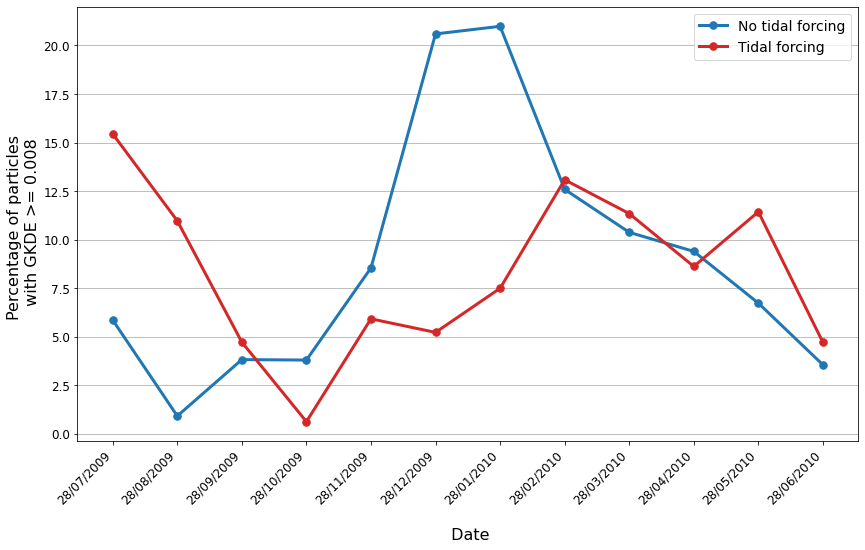

In [29]:
plt.figure(figsize=(14, 8)) #(17,5) 

ax = plt.subplot(111)
    
ax.plot(x, perc_0080_nT, '.-', label='No tidal forcing', color='C0', linewidth=3, markersize=15)
ax.plot(x, perc_0080_wT, '.-', label='Tidal forcing', color='C3', linewidth=3, markersize=15)
        
ax.set_xticks(x)
ax.set_xticklabels(labels_d, rotation=45, horizontalalignment='right')
ax.legend(fontsize=14)
#ax.set_ylim([0, .014])
ax.grid(axis='y')
ax.set_ylabel('Percentage of particles \n with GKDE >= 0.008', size=16)
ax.set_xlabel('\n Date', size=16)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('../../Figures/' + 'KDE_nT_wT_monthly_ALL_perc_0080_Line.jpg', dpi=300)

plt.show()
